In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dental X-Ray Medical Diagnosis with Deep Learning

In this hands-on exercise, you will explore medical image diagnosis by building a state-of-the-art dental X-ray classifier using Keras 

The exercise will walk through some of the steps of building and evaluating this deep learning classifier model. In particular, you will:
- Pre-process, prepare and visualize a real-world dental X-ray dataset.
- Load and train AlexNet (Deep Learning Model) for X-ray image classification.
- Monitor the performance of a model during training using the Keras API to avoid underfitting/overfitting model for better results.
- Visualizing and Evaluating classification models


## Table of Contents

- [1. Import Packages](#1)
- [2. Data Exploration & Image Pre-Processing](#2)
    - [2.1 Exploring the dataset](#2-1)
    - [2.2 Loading images with labels](#2-2)
    - [2.3 Dataset Pre-Processing](#2-3)
    - [2.4 Dataset Visualization](#2-4)
- [3. Model Development](#3)
    - [3.1 AlexNet ](#3-1)
    - [3.2 Model's Summary](#3-2)
- [4. Model Training](#4)
    - [4.1 Define Training Function](#4-1)
    - [4.2 Model Training](#4-2)
- [5. Evaluation](#5)
    - [5.1 Visualize Model's Accuracy ](#5-1)
    - [5.2 Plot Confusion Matrix](#5-2)
    - [5.3 Classification Report](#5-3)

<a name="1"></a>
## Import Packages

In this assignment, we'll make use of the following packages:

- `keras` is a framework for building deep learning models.
- `numpy` is a library for mathematical and scientific operations.
- `pandas` is what we'll use to manipulate our data.
- `matplotlib` and `matplotlib` for creating the graphs
- `os`
- `cv2`
- `PIL`

Run the next cell to import all the necessary packages.

In [ ]:
#import necessary packages
import os
import cv2
from PIL import Image
import numpy as np

#libraries for loading, training deep learning model
# layers 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# metric
from keras.metrics import categorical_crossentropy
# optimization 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam



<a name="2"></a>
## 2. Data Exploration & Image Pre-Processing

- The dataset contains 3,684 images of five different types of dental lesions. The image distribution between training and testing set is as follow:
- The training set consists of 624 Primary Endo with Secondary Perio, 588 Primary Endodontic, 529 Primary Perio with Secondary Endo, 604 Primary Periodontal, 600 True Combined images.
- The testing set consists of 156 Primary Endo with Secondary Perio, 147 Primary Endodontic, 133 Primary Perio with Secondary Endo, 152 Primary Periodontal, 151 True Combined images.

<a name="1-1"></a>
### 2.1 Exploring the dataset
Run the next 3 cells to see image distribution between training and testing sets:

In [ ]:
#load train and test folders
train_path = os.getcwd() + '/' + 'drive/MyDrive/Anum Fatima (MSSE-26) /workshop/Train_Test_Split/train/' 
test_path = os.getcwd() + '/' + 'drive/MyDrive/Anum Fatima (MSSE-26) /workshop/Train_Test_Split/test/'


In [ ]:
#check the number of images in each subfolders within the training set 
print('The training set consists of:\n', 
      len(os.listdir(train_path + 'PrimaryEndowithSecondaryPerio/')), 'Primary Endo with Secondary Perio images,\n', 
      len(os.listdir(train_path + 'PrimaryEndodontic/')), 'Primary Endodontic images,\n', 
      len(os.listdir(train_path + 'PrimaryPeriowithSecondaryEndo/')), 'Primary Perio with Secondary Endo images,\n', 
      len(os.listdir(train_path + 'PrimaryPeriodontal/')), 'Primary Periodontal images,\n', 
      len(os.listdir(train_path + 'TrueCombined/')), 'True Combined images.' )

The training set consists of:
 624 Primary Endo with Secondary Perio images,
 588 Primary Endodontic images,
 529 Primary Perio with Secondary Endo images,
 604 Primary Periodontal images,
 600 True Combined images.


In [ ]:
#check the number of images in each subfolders within the testing set 

print('The testing set consists of:\n', 
      len(os.listdir(test_path + 'PrimaryEndowithSecondaryPerio/')), 'Primary Endo with Secondary Perio images,\n', 
      len(os.listdir(test_path + 'PrimaryEndodontic/')), 'Primary Endodontic images,\n', 
      len(os.listdir(test_path + 'PrimaryPeriowithSecondaryEndo/')), 'Primary Perio with Secondary Endo images,\n', 
      len(os.listdir(test_path + 'PrimaryPeriodontal/')), 'Primary Periodontal images,\n', 
      len(os.listdir(test_path + 'TrueCombined/')), 'True Combined images.' )

The testing set consists of:
 156 Primary Endo with Secondary Perio images,
 147 Primary Endodontic images,
 133 Primary Perio with Secondary Endo images,
 152 Primary Periodontal images,
 151 True Combined images.


<a name="2-2"></a>
### 2.2 Loading images with labels
Run the next cell code cells to load the images along with their labels    
    
    

In [ ]:

#initialize a variable "cates" and mention the names of the subfolders 
cates = ['PrimaryEndowithSecondaryPerio', 'PrimaryEndodontic','PrimaryPeriowithSecondaryEndo','PrimaryPeriodontal','TrueCombined']

def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for index, cate in enumerate(cates): 
    for img_name in os.listdir(data_path + cate + '/'):
      i = i +1
      print(img_name)
      #print(i)
      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img)
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y


Run the next cell to load the data into X_train, X_test, y_train and y_test

In [ ]:
X_train, y_train = load_images_and_labels(train_path, cates)
X_test, y_test = load_images_and_labels(test_path, cates)

img_29_2958.JPG
img_76_8630.JPG
img_34_2632.JPG
img_5_5347.JPG
img_74_355.JPG
img_36_411.JPG
img_53_7078.JPG
img_117_2211.JPG
img_15_4514.JPG
img_46_8915.JPG
img_69_1442.JPG
img_81_8664.JPG
img_84_4339.JPG
img_119_5279.JPG
img_33_3988.JPG
img_44_5190.JPG
img_105_389.JPG
img_80_6965.JPG
img_51_1443.JPG
img_16_9107.JPG
img_111_4482.JPG
img_85_6952.JPG
img_6_4566.JPG
img_30_4999.JPG
img_95_9426.JPG
img_83_4489.JPG
img_57_3005.JPG
img_25_883.JPG
img_8_5319.JPG
img_11_8270.JPG
img_100_7149.JPG
img_89_2842.JPG
img_82_6241.JPG
img_18_1111.JPG
img_35_8133.JPG
img_52_9200.JPG
img_17_762.JPG
img_107_5016.JPG
img_65_4975.JPG
img_39_7218.JPG
img_93_62.JPG
img_13_4597.JPG
img_26_7511.JPG
img_58_9647.JPG
img_91_836.JPG
img_62_2563.JPG
img_71_2465.JPG
img_110_2943.JPG
img_101_4463.JPG
img_96_4790.JPG
img_66_5957.JPG
img_68_2788.JPG
img_79_8239.JPG
img_78_8447.JPG
img_42_9905.JPG
img_60_4871.JPG
img_48_3851.JPG
img_3_1224.JPG
img_27_9534.JPG
img_41_6464.JPG
img_118_2256.JPG
img_23_649.JPG
img_20_2260.

- The size of the dataset can be huge (i.e. more than 50,000 images) sometimes and take longer to load it. Hence it is better to save it for later using

- Save X_train, y_train, X_test, y_test into a dictionary, namely data_dict

In [ ]:
data_dict = {'X_train' : X_train, 
             'y_train': y_train, 
             'X_test': X_test, 
             'y_test': y_test}
np.save('dataset.npy', data_dict)

Load X_train, y_train, X_test, y_test


In [ ]:
data_dict_ = np.load('dataset.npy', allow_pickle = True).item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

Sanity Check: Display randomly some images of the training set 

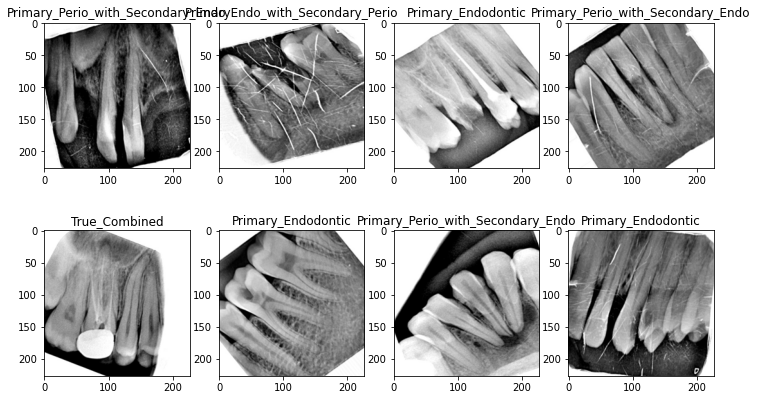

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12,7))
cate = ['PrimaryEndo_with_Secondary_Perio', 'Primary_Endodontic','Primary_Perio_with_Secondary_Endo','Primary_Periodontal','True_Combined']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])


<a name="2-3"></a>
### 2.3 Dataset Pre-Processing
This task consists of the following steps:

*  Convert integer values into floats
*  Normalization
*  One-hot encoding the labels

Run next cell to perform the above mentioned steps


In [ ]:
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
    
  return X, y
  
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)


<a name="2-4"></a>
### 2.4 Dataset Visualization
Run the cell below to visualize a random selection of images from the dataset.

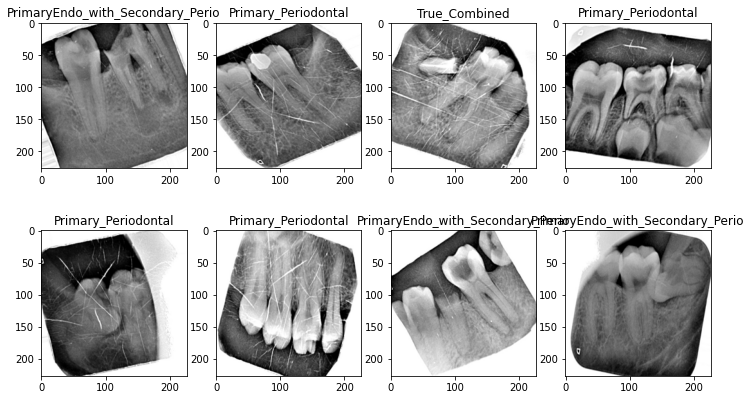

In [ ]:
#Visualize randomly some images of the training set after preprocessing:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

<a name="3"></a>
## **3. Model Development**

---

Now let's build our model. In this assignment we will be building a [AlexNet](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/). 
- AlexNet is a classic convolutional neural network architecture. It consists of convolutions, max pooling and dense layers as the basic building blocks. 
- Feel free to familiarize yourself with the architecture by reading [this paper](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf).

<img src="https://miro.medium.com/max/1400/1*URjdtW2AjcUCUQzN0YEz3Q.png" width="50%">



<a name="3-1"></a>
### 3.1  AlexNet 

In our problem, we have five categories of lesions. Hence, the output of Alexnet model needs to be adjusted to fit the problem. For more detail, the neuron number in the output layer, in this case, is two. 

Run cell below to create the model


In [ ]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                   activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = Adam(lr = 0.0001)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model


<a name="3-2"></a>
### 3.2  Model's Summary

Run next cell to see the number of parameters that will be trained

In [ ]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<a name="4"></a>
## **4. Model Training**

Applied data augmentation technique to the training set to reduce overfitting. It includes image rotation of 5 degrees, width shift range of 10%, height shift range of 10%, and horizontal flip. These techniques can be affected by ImageDataGenerator function from the keras.preprocessing.image module.


<a name="4-1"></a>
### 4.1 Define Training Function  
- To avoid the model from overfitting or underfitting, Checkpoint and Early Stopping are added. You can learn more about [this](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping//). 
- **Early stopping** is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to overfit.
- **ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import tensorflow as tf 
from keras.callbacks import TensorBoard
from sklearn.metrics import precision_score
from keras.callbacks import ModelCheckpoint, EarlyStopping



def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, 
                               height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)


  checkpoint = ModelCheckpoint("AlexNet_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
  early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
  #The “monitor” allows you to specify the performance measure to monitor in order to end training
  #Model Checkpoint allows saving the model into a file for later use

  steps = X_train.shape[0]//batch_size


  # Fitting the model
  history = model.fit_generator(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = [checkpoint,early])
  #callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

  
  # Evaluating the model
  #below two lines evaluate the model and show the achieved accuracy
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('Achieved Accuracy using AlexNet: %.3f' % (acc * 100.0))
  
  return history, acc



<a name="4-2"></a>
### 4.2 Model Training

Run cell below to train the model on the dataset


**Note:** The following cell can take about 10-15 minutes to run 20 epochs

In [ ]:
import datetime
start = datetime.datetime.now()

train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, 
                                 epochs = 50, batch_size = 8)

end = datetime.datetime.now()
print("Total execution time is: ", end-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
368/368 [==============================] - ETA: 0s - loss: 1.6021 - accuracy: 0.2380
Epoch 1: val_accuracy improved from -inf to 0.28281, saving model to AlexNet_model.h5
368/368 [==============================] - 48s 97ms/step - loss: 1.6021 - accuracy: 0.2380 - val_loss: 1.5633 - val_accuracy: 0.2828
Epoch 2/50
368/368 [==============================] - ETA: 0s - loss: 1.5612 - accuracy: 0.2812
Epoch 2: val_accuracy improved from 0.28281 to 0.28958, saving model to AlexNet_model.h5
368/368 [==============================] - 36s 97ms/step - loss: 1.5612 - accuracy: 0.2812 - val_loss: 1.5222 - val_accuracy: 0.2896
Epoch 3/50
368/368 [==============================] - ETA: 0s - loss: 1.5372 - accuracy: 0.3041
Epoch 3: val_accuracy improved from 0.28958 to 0.36536, saving model to AlexNet_model.h5
368/368 [==============================] - 36s 97ms/step - loss: 1.5372 - accuracy: 0.3041 - val_loss: 1.5151 - val_accuracy: 0.3654
Epoch 4/50
368/368 [=============================

Training the model takes a lot of time. Hence, it is better to save the model in a file for later use

After 50 epochs, the results are:


**Model Accuracy:** 91.475

**Total execution time:**  0:32:01.874730



<a name="5"></a>
## **5. Evaluation**

<a name="5-1"></a>
### 5.1 Visualize Model's Accuracy 

Run next 2 cells to visualize the accuracy and loss on both training and testing sets during training the model:

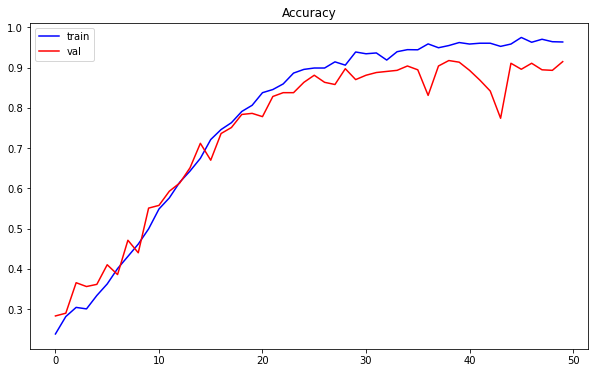

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  
plot_accuracy(train_history)

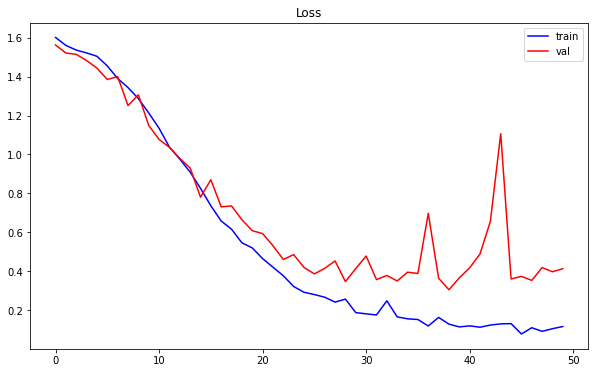

In [ ]:
def plot_loss(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['loss'], color = 'blue', label = 'train')
  plt.plot(history.history['val_loss'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Loss')
  plt.show()
  
plot_loss(train_history)

<a name="5-2"></a>
### 5.2 Plot Confusion Matrix

Determine the confusion matrix

In [ ]:
#make predictions using trained model
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 227, 227, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)



Text(69.0, 0.5, 'True classes')

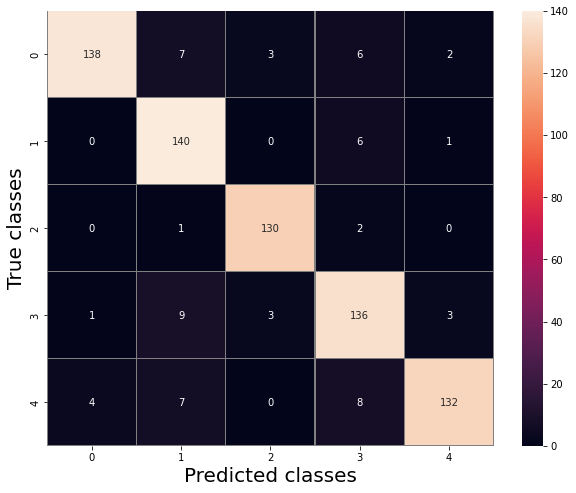

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Reverse the true and the predicted labels into the original binary 
# labels (0 and 1) to compute the confusion matrix
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
#sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', 
            #fmt = '.1f', annot = True)
sns.heatmap(conf_mat, linewidths = 0.1, linecolor = 'gray', 
            fmt = 'g', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

In [ ]:
Alexnet_model.evaluate(X_test, y_test)
#shows the loss and accuracy of the model using 'evaluate'

24/24 [==============================] - 0s 18ms/step - loss: 0.4122 - accuracy: 0.9147


[0.41224855184555054, 0.9147496819496155]

<a name="5-3"></a>
### 5.3 Classification Report 

The classification report shows the precision, recall, f1-score for each class 

In [ ]:

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels, y_test_pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       156
           1       0.85      0.95      0.90       147
           2       0.96      0.98      0.97       133
           3       0.86      0.89      0.88       152
           4       0.96      0.87      0.91       151

    accuracy                           0.91       739
   macro avg       0.92      0.92      0.92       739
weighted avg       0.92      0.91      0.92       739



# That's all 